# (1).Housing_Price_Prediction

In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# Load the dataset

In [3]:
House = pd.read_csv(r"C:\Users\TarunSrinivasa Reddy\Downloads\Housing_Price_Prediction.zip",header=0)
# Copy to back-up file

House_bk=House.copy()

# Display first 5 records

House.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
House.shape

(5000, 7)

# Information Of the dataset

In [5]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


# Null values in the dataset 

In [6]:
House.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
#balancing and imbalancing
House_count =House.Address.value_counts()
print('Class 0:', House_count[0])
print('Class 1:', House_count[1])
print('proportion:',round(House_count[0]/House_count[1],2),':1')
print('total bank records:',len(House))

Class 0: 1
Class 1: 1
proportion: 1.0 :1
total bank records: 5000


# Duplicates in the dataset

In [8]:
House_dup=House[House.duplicated(keep='last')]
House_dup

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [9]:
House.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
col=["Address"]
for i in col:
    House[i]=obj.fit_transform(House[i])

In [11]:
House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   int32  
dtypes: float64(6), int32(1)
memory usage: 254.0 KB


In [12]:
cols=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']

In [13]:
House_bk['Address'].value_counts()

208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
314 Christopher Square Apt. 404\nLake Ronaldville, SD 42025      1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
481 Kaitlin Mission Apt. 309\nJodystad, IA 16947                 1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: Address, Length: 5000, dtype: int64

In [14]:
cols

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

In [15]:
House.head(10)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,962
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,863
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,4069
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,4794
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,4736
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,311
6,64698.463428,6.025336,8.147760,3.41,60828.249085,1.502056e+06,2147
7,78394.339278,6.989780,6.620478,2.42,36516.358972,1.573937e+06,4344
8,59927.660813,5.362126,6.393121,2.30,29387.396003,7.988695e+05,4806
9,81885.927184,4.423672,8.167688,6.10,40149.965749,1.545155e+06,4990


# Bargraph for each column

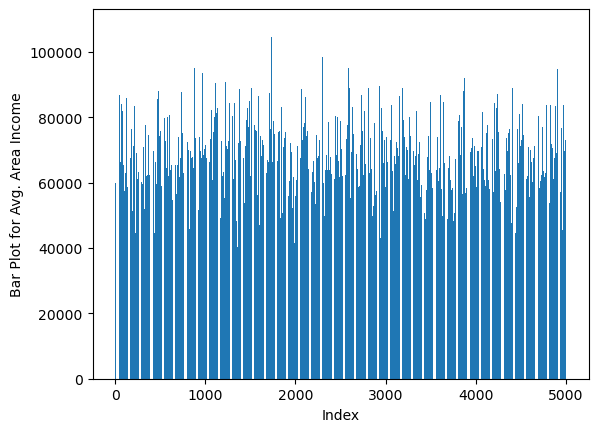

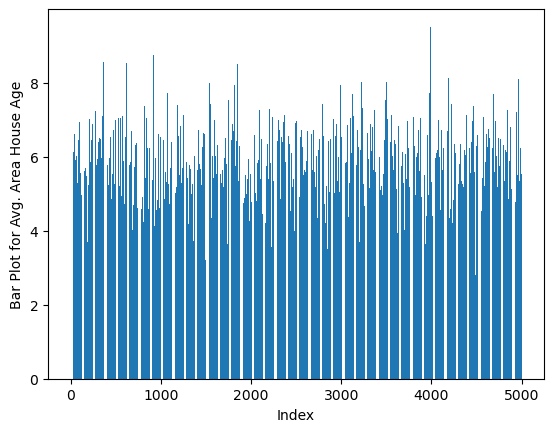

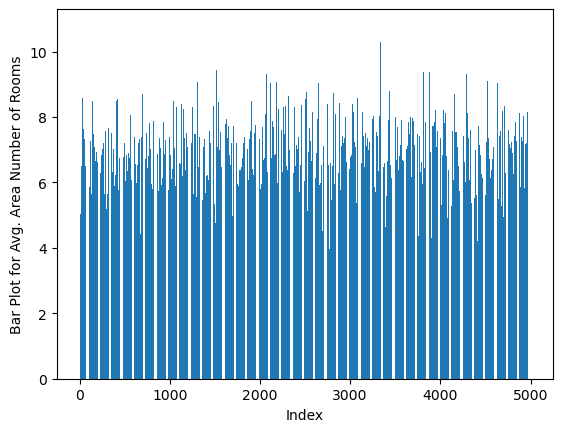

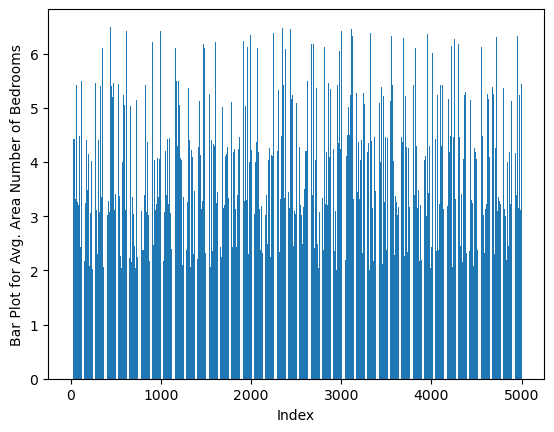

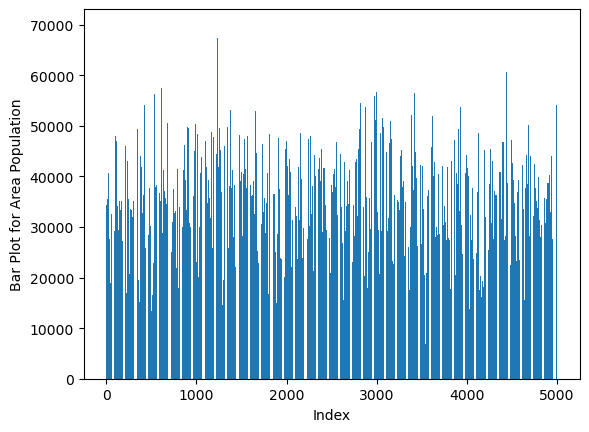

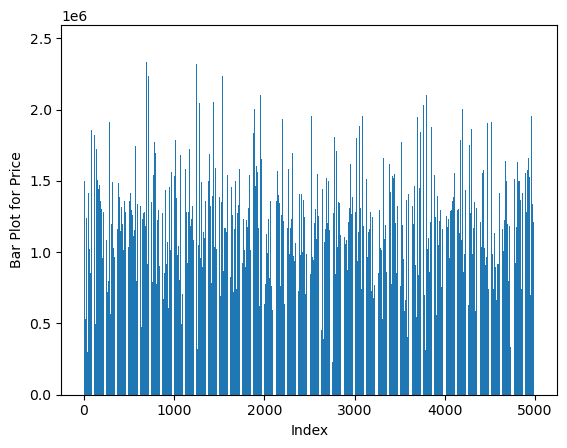

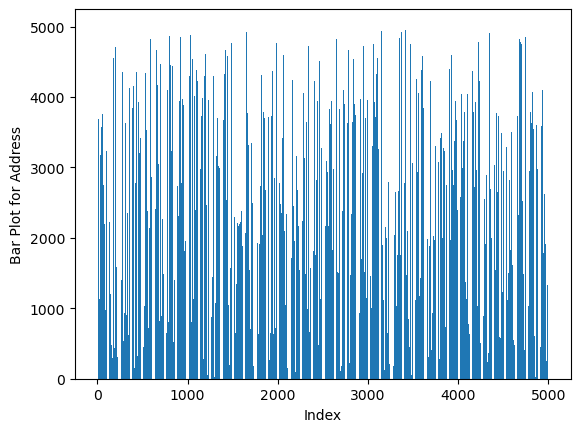

In [16]:
for column in House.columns:
    plt.figure()
    plt.bar(House.index,House[column])
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.ylabel(f'Bar Plot for {column}')
    plt.show()

# Scatter Matrix Plot

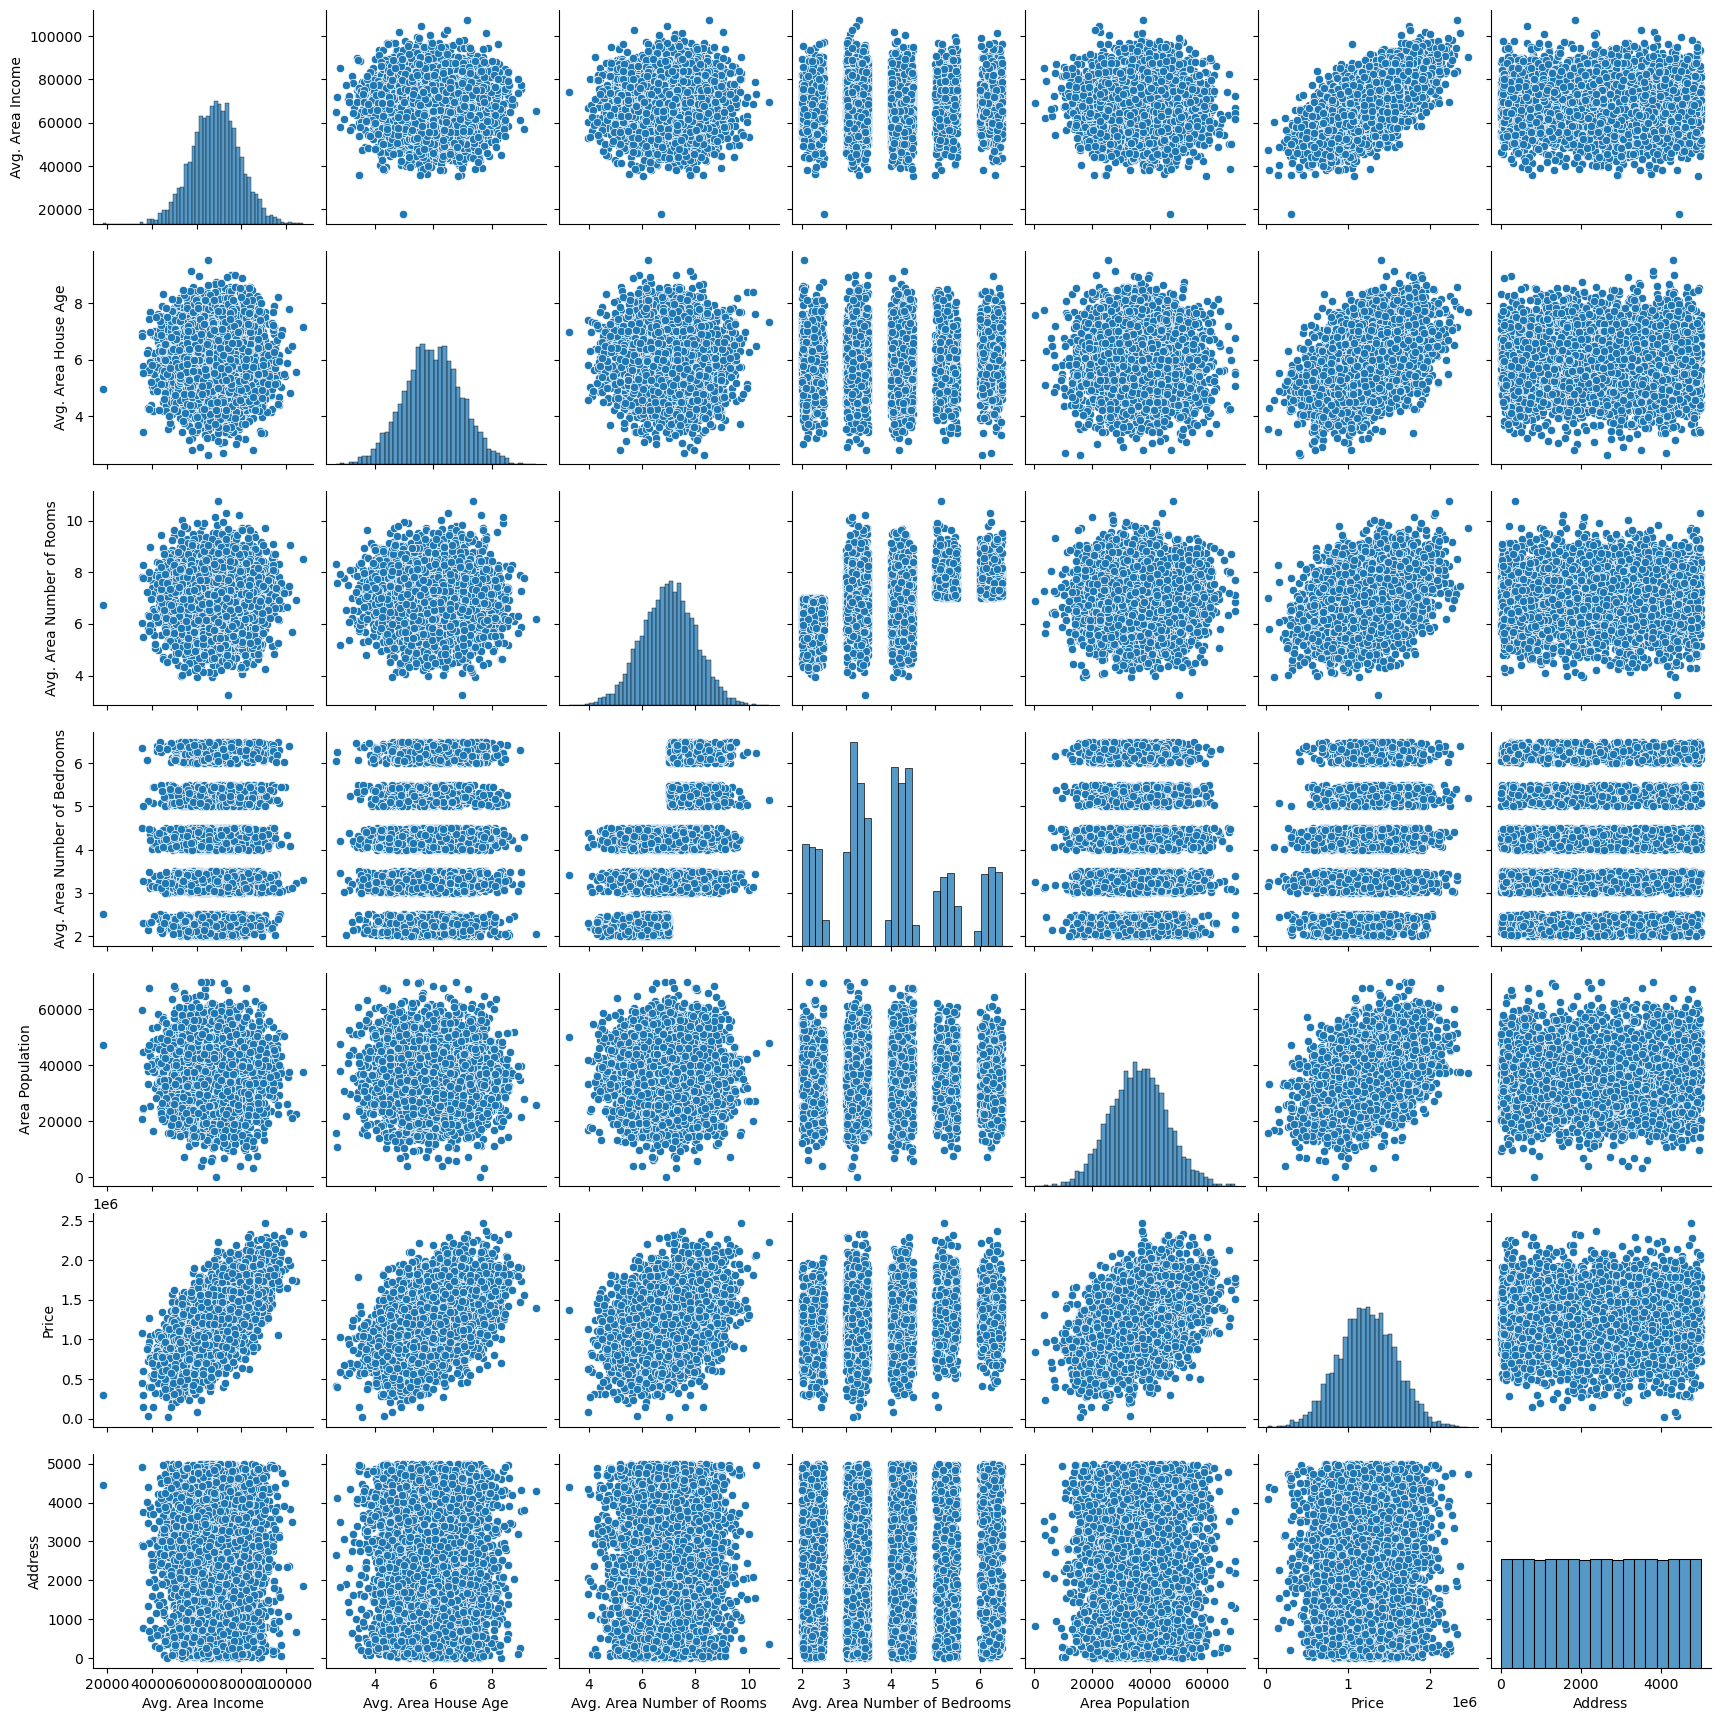

In [17]:
sns.pairplot(House.select_dtypes(include=['number']))

#  Define Independent and Dependent  Variables

In [18]:
#Identify the independent and target variable

IndepVar=[]
for col in House.columns:
    if col!='Price':
        IndepVar.append(col)
        
        
TargetVar='Price'

x=House[IndepVar]
y=House[TargetVar]

# split the dataset

In [19]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3500, 6), (1500, 6), (3500,), (1500,))

# Scaling the dataset

In [20]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

In [21]:
x_train.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address
1840,0.430910,0.187638,0.812756,0.528889,0.607096,2802
2115,0.512151,0.557007,0.626246,0.264444,0.659988,3818
4437,0.685209,0.398545,0.710833,0.246667,0.353072,2645
1146,0.552890,0.541590,0.506534,0.262222,0.375796,600
2486,0.593217,0.618394,0.717203,0.508889,0.504906,4757


# Linear Regression Algorithm

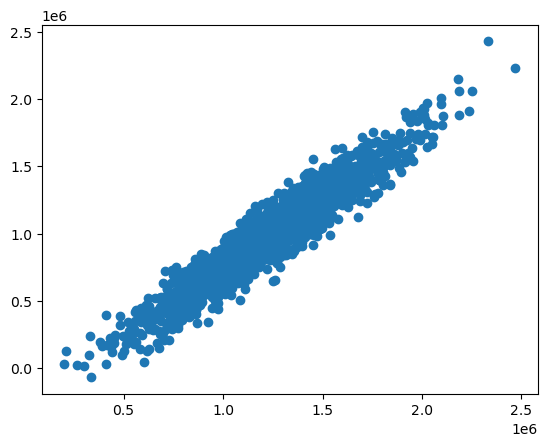

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
ModelLR=LinearRegression()
ModelLR.fit(x_train,y_train)
y_pred=ModelLR.predict(x_test)
plt.scatter(y_test,y_pred)

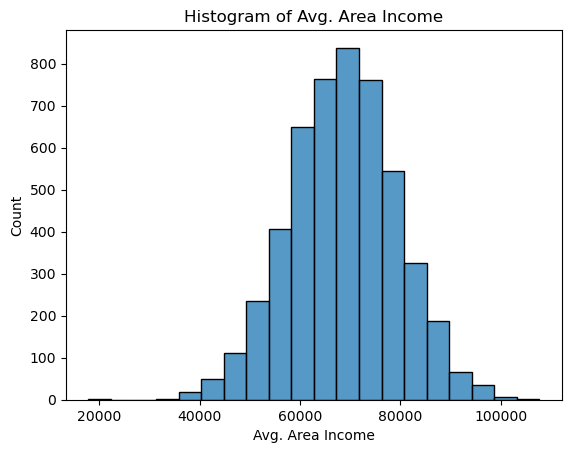

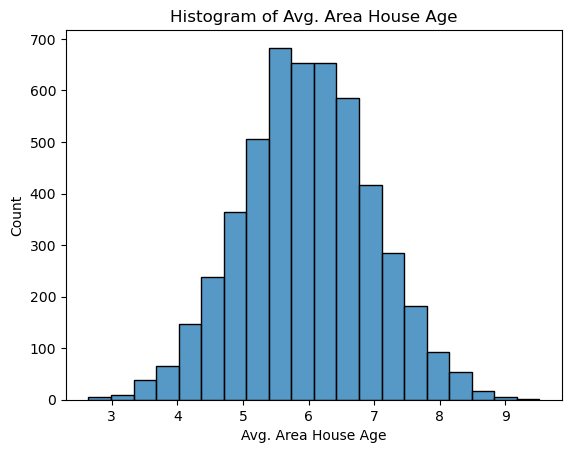

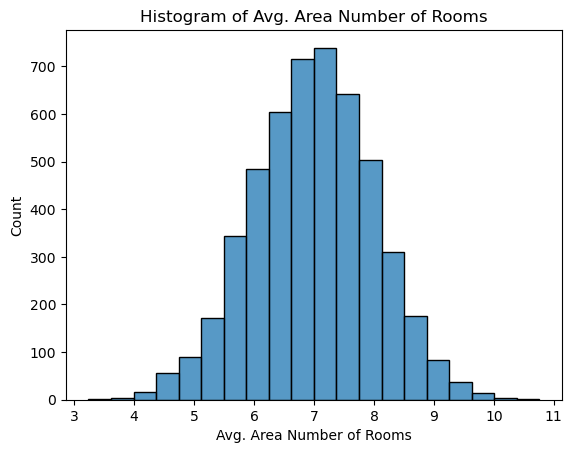

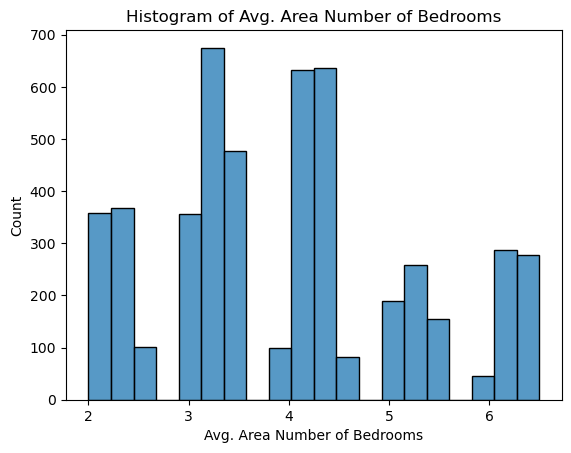

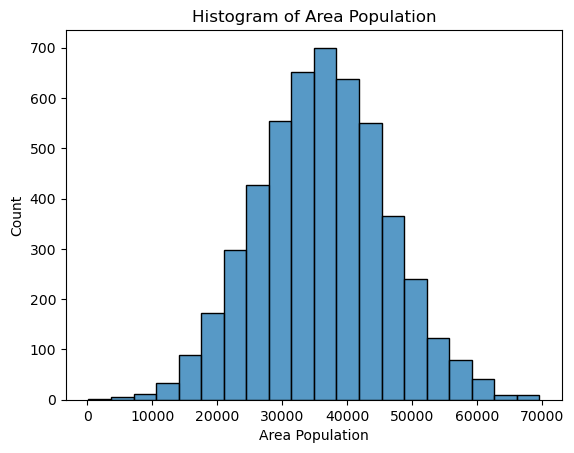

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have imported your dataset as 'House' already

# Selecting only numerical columns (float64 and int64) excluding 'Price'
numerical_columns = House.select_dtypes(include=['float64', 'int64']).drop(columns=['Price'])

# Creating a histogram for each numerical column with 20 bins and no KDE
for column in numerical_columns.columns:
    sns.histplot(data=numerical_columns[column], bins=20, kde=False)
    plt.title(f'Histogram of {column}')
    plt.show()


In [28]:
print('Mean Absolute Error (MAE):',round(metrics.mean_absolute_error(y_test,y_pred),3))
print('Mean Squared Error (MAE):',round(metrics.mean_squared_error(y_test,y_pred),3))
print('Root Mean Squared Error (RMAE):',round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))
print('R2_score:',round(metrics.r2_score(y_test,y_pred),6))
print('Mean Absolute Percentage Error (MAPE):',round(metrics.mean_absolute_percentage_error(y_test,y_pred)*100,3),'%')
print('Root Mean Squared Log Error (RMSLE):',round(np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),3))

Mean Absolute Error (MAE): 246996.292
Mean Squared Error (MAE): 73160459813.666
Root Mean Squared Error (RMAE): 270481.903
R2_score: 0.38005
Mean Absolute Percentage Error (MAPE): 22.081 %
Root Mean Squared Log Error (RMSLE): 12.508
